In [1]:
import numpy as np 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("nifty50.csv")

In [3]:
df.columns

Index(['Symbol', 'Open', 'High', 'Low', 'Last Traded Price', 'Change',
       '%Change', 'Traded Volume(lacs)', 'Traded Value(crs)', '52 Week High',
       '52 Week Low', '365 Days % Change', '30 Days % Change', 'Yrows',
       'Xcols'],
      dtype='object')

In [4]:
df.drop(['Open','Last Traded Price', 'Change','Traded Volume(lacs)', 'Traded Value(crs)', '52 Week High',

'52 Week Low', '365 Days % Change', '30 Days % Change'],axis=1,inplace=True)

In [5]:
df.head(2)

,Symbol,High,Low,%Change,Yrows,Xcols
0,IBULHSGFIN,521,447,14.77,1,1
1,EICHERMOT,"17,787.95","16,730.15",4.69,1,2


In [6]:
df.rename(columns={"%Change":"Change"},inplace=True)

In [7]:
df.head(2)

,Symbol,High,Low,Change,Yrows,Xcols
0,IBULHSGFIN,521,447,14.77,1,1
1,EICHERMOT,"17,787.95","16,730.15",4.69,1,2


In [8]:
df.shape

(50, 6)

In [66]:
symbol=np.asarray(df["Symbol"]).reshape(5,10)
perchange=np.asarray(df["Change"]).reshape(5,10)
hi=np.asarray(df["High"]).reshape(5,10)
lo=np.asarray(df["Low"]).reshape(5,10)
print(symbol)
print(perchange)
print(hi)
print(lo)

[['IBULHSGFIN' 'EICHERMOT' 'TITAN' 'MARUTI' 'BAJAJFINSV' 'HDFCBANK'
  'BAJFINANCE' 'VEDL' 'HINDUNILVR' 'KOTAKBANK']
 ['ICICIBANK' 'GAIL' 'HDFC' 'HEROMOTOCO' 'M&M' 'INFRATEL' 'GRASIM'
  'BRITANNIA' 'BPCL' 'RELIANCE']
 ['ULTRACEMCO' 'ASIANPAINT' 'ADANIPORTS' 'LT' 'IOC' 'INFY' 'INDUSINDBK'
  'AXISBANK' 'ONGC' 'UPL']
 ['BAJAJ-AUTO' 'DRREDDY' 'BHARTIARTL' 'HCLTECH' 'TCS' 'POWERGRID' 'WIPRO'
  'SBIN' 'SUNPHARMA' 'JSWSTEEL']
 ['NTPC' 'TATAMOTORS' 'ITC' 'ZEEL' 'TATASTEEL' 'COALINDIA' 'HINDALCO'
  'TECHM' 'CIPLA' 'YESBANK']]
[[14.77  4.69  3.45  3.35  2.79  2.32  2.16  2.02  1.94  1.93]
 [ 1.68  1.6   1.45  1.25  1.03  0.98  0.98  0.94  0.82  0.75]
 [ 0.64  0.64  0.55  0.29  0.19  0.16  0.07  0.   -0.11 -0.12]
 [-0.13 -0.23 -0.3  -0.47 -0.58 -0.64 -0.79 -0.85 -0.93 -0.99]
 [-1.04 -1.21 -1.34 -1.51 -1.62 -2.15 -2.24 -2.53 -3.57 -7.85]]
[['521' '17,787.95' '1,077.00' '6,155.00' '7,590.00' '2,289.00'
  '3,449.60' '144.8' '1,846.65' '1,535.50']
 ['422.4' '125.4' '2,240.00' '2,641.90' '548.3' '255' 

In [67]:
symbol

array([['IBULHSGFIN', 'EICHERMOT', 'TITAN', 'MARUTI', 'BAJAJFINSV',
        'HDFCBANK', 'BAJFINANCE', 'VEDL', 'HINDUNILVR', 'KOTAKBANK'],
       ['ICICIBANK', 'GAIL', 'HDFC', 'HEROMOTOCO', 'M&M', 'INFRATEL',
        'GRASIM', 'BRITANNIA', 'BPCL', 'RELIANCE'],
       ['ULTRACEMCO', 'ASIANPAINT', 'ADANIPORTS', 'LT', 'IOC', 'INFY',
        'INDUSINDBK', 'AXISBANK', 'ONGC', 'UPL'],
       ['BAJAJ-AUTO', 'DRREDDY', 'BHARTIARTL', 'HCLTECH', 'TCS',
        'POWERGRID', 'WIPRO', 'SBIN', 'SUNPHARMA', 'JSWSTEEL'],
       ['NTPC', 'TATAMOTORS', 'ITC', 'ZEEL', 'TATASTEEL', 'COALINDIA',
        'HINDALCO', 'TECHM', 'CIPLA', 'YESBANK']], dtype=object)

In [68]:
result=df.pivot(index="Yrows",columns="Xcols",values="Change")
print(result)

Xcols      1     2     3     4     5
Yrows                               
1      14.77  4.69  3.45  3.35  2.79
2       2.32  2.16  2.02  1.94  1.93
3       1.68  1.60  1.45  1.25  1.03
4       0.98  0.98  0.94  0.82  0.75
5       0.64  0.64  0.55  0.29  0.19
6       0.16  0.07  0.00 -0.11 -0.12
7      -0.13 -0.23 -0.30 -0.47 -0.58
8      -0.64 -0.79 -0.85 -0.93 -0.99
9      -1.04 -1.21 -1.34 -1.51 -1.62
10     -2.15 -2.24 -2.53 -3.57 -7.85


In [76]:
labels=np.asarray(["{0}\n{1:.2f}\n{2}\n{3}".format (symb,value,hi,lo)
                 for symb,value,hi,lo in zip(symbol.flatten(),perchange.flatten(),hi.flatten(),lo.flatten())]).reshape(10,5)

In [77]:
labels

array([['IBULHSGFIN\n14.77\n521\n447',
        'EICHERMOT\n4.69\n17,787.95\n16,730.15',
        'TITAN\n3.45\n1,077.00\n1,041.50',
        'MARUTI\n3.35\n6,155.00\n5,927.20',
        'BAJAJFINSV\n2.79\n7,590.00\n7,325.00'],
       ['HDFCBANK\n2.32\n2,289.00\n2,239.80',
        'BAJFINANCE\n2.16\n3,449.60\n3,340.00',
        'VEDL\n2.02\n144.8\n138.4',
        'HINDUNILVR\n1.94\n1,846.65\n1,800.90',
        'KOTAKBANK\n1.93\n1,535.50\n1,504.25'],
       ['ICICIBANK\n1.68\n422.4\n414.5', 'GAIL\n1.60\n125.4\n120.6',
        'HDFC\n1.45\n2,240.00\n2,178.75',
        'HEROMOTOCO\n1.25\n2,641.90\n2,600.00', 'M&M\n1.03\n548.3\n530'],
       ['INFRATEL\n0.98\n255\n248.2', 'GRASIM\n0.98\n767\n739',
        'BRITANNIA\n0.94\n2,644.35\n2,522.30', 'BPCL\n0.82\n350.9\n341',
        'RELIANCE\n0.75\n1,175.50\n1,152.30'],
       ['ULTRACEMCO\n0.64\n4,383.70\n4,240.70',
        'ASIANPAINT\n0.64\n1,581.90\n1,561.00',
        'ADANIPORTS\n0.55\n380.5\n374.25',
        'LT\n0.29\n1,392.50\n1,361.10', 'I

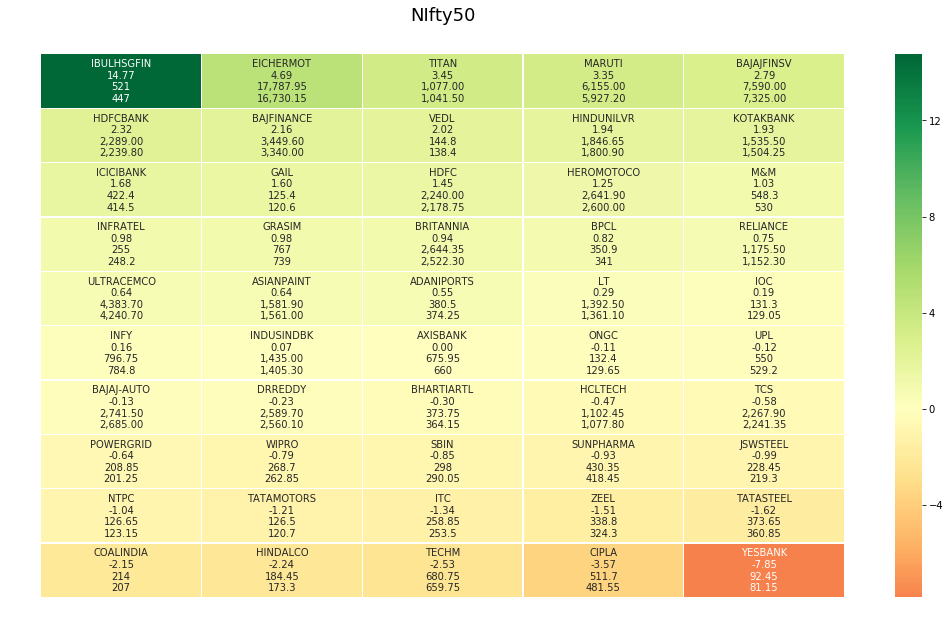

In [78]:
fig,ax=plt.subplots(figsize=(18,10))
title="NIfty50"
plt.title(title,fontsize=18)
ttl=ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sn.heatmap(result,annot=labels,fmt="",cmap="RdYlGn",center=0,linewidths=0.30,ax=ax)
plt.show()

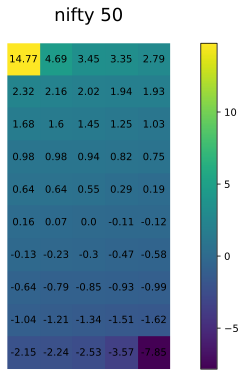

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

fig,ax=plt.subplots(figsize=(11,6))
title="nifty 50"
plt.title(title,fontsize=18)
ttl=ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
im=ax.imshow(result)
fig.colorbar(im)
for (j,i), x in np.ndenumerate(result):
    url = "https://www.nseindia.com/products/content/equities/equities/archieve_eq.htm"
    ax.annotate(x, xy=(i,j), ha="center", va="center", 
            url=url, bbox=dict(color="w", alpha=1e-6, url=url))
plt.show()  